### Domain Analysis Report

1. Introduction

Transaction fraud detection is a critical area in the financial industry, where companies utilize advanced technologies and data science methodologies to identify and prevent fraudulent activities. This domain analysis report provides an overview of the transaction fraud detection domain, focusing on its significance, challenges, and strategies for effective detection.

2. Significance of Transaction Fraud Detection

Transaction fraud poses significant risks to financial institutions, businesses, and consumers. It can result in financial losses, damage to reputation, and erosion of trust among customers. By detecting and preventing fraudulent transactions, companies can safeguard their assets, maintain customer confidence, and comply with regulatory requirements.

3. Challenges in Transaction Fraud Detection

Data Imbalance: Transaction datasets often exhibit imbalanced class distributions, with a small percentage of transactions being fraudulent. This imbalance can challenge the training and evaluation of machine learning models.
Sophisticated Fraud Techniques: Fraudsters continuously evolve their tactics, making detection more challenging. They may employ techniques such as identity theft, account takeover, and sophisticated social engineering methods.
Real-time Processing: Transaction fraud detection systems must operate in real-time to identify suspicious activities promptly. Delays in detection could result in significant financial losses.
Adversarial Attacks: Fraudsters may attempt to evade detection by exploiting vulnerabilities in the detection systems. Adversarial attacks aim to deceive machine learning models by subtly modifying input data.

4. Strategies for Effective Transaction Fraud Detection

Machine Learning Algorithms: Machine learning algorithms play a crucial role in transaction fraud detection. Supervised learning techniques such as logistic regression, decision trees, random forests, and neural networks are commonly used to classify transactions as fraudulent or legitimate.
Feature Engineering: Feature engineering involves selecting and transforming relevant features from transaction data to improve model performance. Features such as transaction amount, time of day, location, and user behavior can provide valuable insights for fraud detection.
Ensemble Methods: Ensemble methods combine multiple machine learning models to enhance predictive performance. Techniques such as bagging, boosting, and stacking can help mitigate the effects of data imbalance and improve model robustness.
Anomaly Detection: Anomaly detection techniques identify outliers or unusual patterns in transaction data that deviate from normal behavior. Unsupervised learning algorithms such as isolation forest and k-means clustering can be effective for detecting fraudulent transactions.
Continuous Monitoring and Feedback Loop: Transaction fraud detection systems should be continuously monitored and updated to adapt to evolving fraud patterns. A feedback loop mechanism enables the system to learn from new data and improve detection accuracy over time.

5. Future Trends and Technologies

Deep Learning: Deep learning techniques, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs), hold promise for enhancing transaction fraud detection capabilities, especially in processing complex sequential data.
Explainable AI (XAI): Explainable AI methods aim to provide transparency and interpretability in machine learning models, enabling stakeholders to understand the factors contributing to fraud predictions.
Blockchain Technology: Blockchain technology offers potential solutions for enhancing transaction security and transparency. Distributed ledger systems can provide immutable records of transactions, making it difficult for fraudsters to manipulate data.
Behavioral Biometrics: Behavioral biometrics, such as keystroke dynamics and mouse movement patterns, can supplement traditional authentication methods and enhance fraud detection accuracy by analyzing user behavior in real-time.

6. Conclusion

Transaction fraud detection is a critical domain that requires continuous innovation and collaboration between domain experts, data scientists, and technology providers. By leveraging advanced analytics, machine learning algorithms, and emerging technologies, companies can effectively detect and mitigate fraudulent activities, safeguarding their assets and preserving customer trust.

### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

### 2. Importing the Data

In [3]:
data=pd.read_csv("fraud_0.1origbase.csv")

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,0,0
636258,184,CASH_OUT,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,0,0
636259,35,PAYMENT,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,0,0
636260,277,CASH_OUT,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,0,0


### 3. Checking for Null values 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


 ### 4. General info about the Data

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [7]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
636257,351,CASH_OUT,28761.10,C742050657,0.0,0.00,C568407561,328534.52,357295.62,0,0
636258,184,CASH_OUT,167820.71,C561181412,62265.0,0.00,C1852953580,106429.48,274250.18,0,0
636259,35,PAYMENT,8898.12,C1773417333,30808.0,21909.88,M445701551,0.00,0.00,0,0
636260,277,CASH_OUT,176147.90,C1423233247,83669.0,0.00,C1328739120,0.00,176147.90,0,0
636261,304,CASH_OUT,95142.89,C874575079,0.0,0.00,C666451134,431380.07,526522.96,0,0


In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.000000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,242.931935,1.800585e+05,8.317937e+05,8.528354e+05,1.096212e+06,1.221809e+06,0.001290,0.000003
std,142.330857,6.069714e+05,2.885636e+06,2.921296e+06,3.375389e+06,3.656213e+06,0.035898,0.001773
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.340742e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,238.000000,7.481577e+04,1.423900e+04,0.000000e+00,1.315397e+05,2.147127e+05,0.000000,0.000000
75%,334.000000,2.084988e+05,1.072998e+05,1.435652e+05,9.384820e+05,1.109230e+06,0.000000,0.000000
max,742.000000,5.722962e+07,4.368662e+07,4.367380e+07,3.551855e+08,3.555534e+08,1.000000,1.000000


In [9]:
data.shape

(636262, 11)

In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
data.select_dtypes(include=['int64','float64']).columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [12]:
data.select_dtypes(include=['object']).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

### 5. Exploratory Data Analysis 

#### --> Univariant Analysis

In [13]:
import sweetviz as sv # library for univariant analysis
my_report=sv.analyze(data) # passing the original dataframe
my_report.show_html() # arguments will generate to the library 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### --> Multivariate Analysis

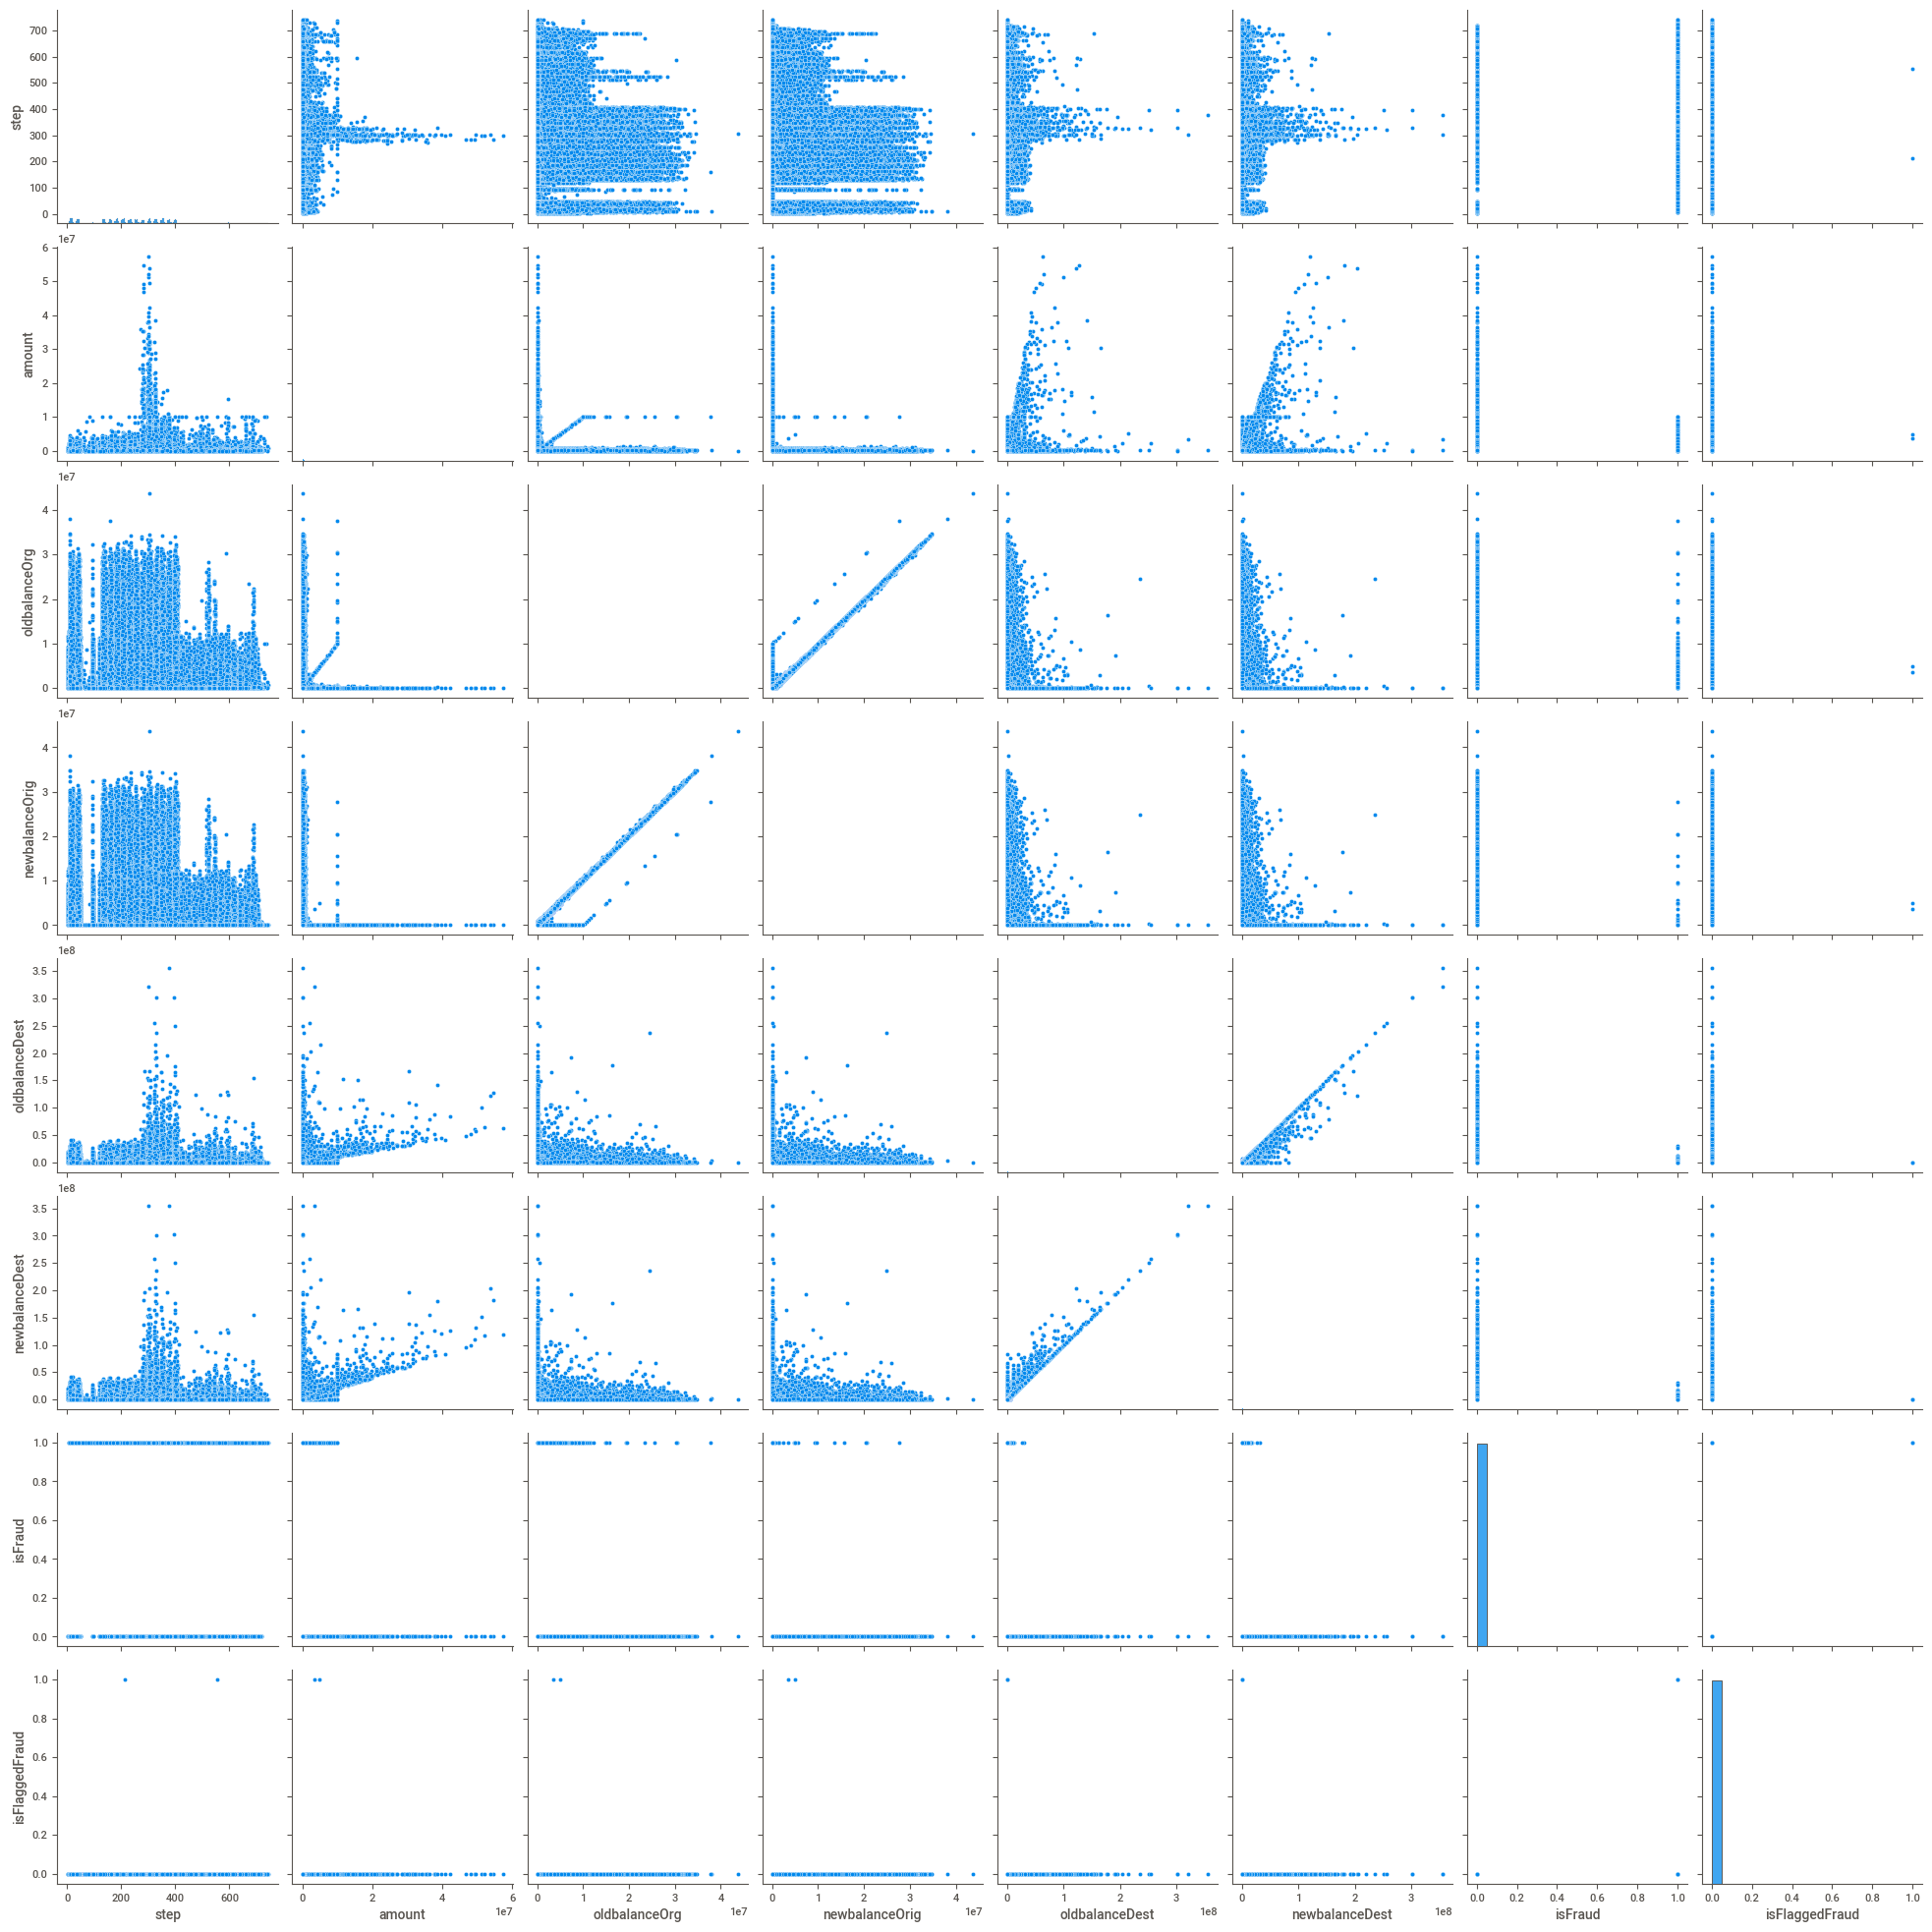

In [14]:
sns.pairplot(data)

### 6. Data Preprocessing and Feature Engineering

In [15]:
for i in data.columns:
    data[i].replace("", np.nan,inplace=True)

In [16]:
data.isna().sum() #cheking the Nan values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
data.duplicated().sum() #checking duplicates

0

#### Converting Categorical data into Numerical data 

###### --> LabelEncoding

In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [20]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
#type
data.type =enc.fit_transform(data.type )

#nameOrig
data.nameOrig =enc.fit_transform(data.nameOrig )

#nameDest
data.nameDest =enc.fit_transform(data.nameDest )

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  int32  
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  int32  
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  int32  
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 46.1 MB


###### --> Processed Data

In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,0,210329.84,52589,3778062.79,3988392.64,27440,1519266.60,1308936.76,0,0
1,132,1,215489.19,122703,21518.00,0.00,175551,6345756.55,6794954.89,0,0
2,355,2,4431.05,19562,20674.00,16242.95,212921,80876.56,85307.61,0,0
3,135,1,214026.20,153427,46909.73,0.00,7512,13467450.36,13681476.56,0,0
4,381,1,8858.45,580587,0.00,0.00,189661,1667180.58,1676039.03,0,0


In [24]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,0,210329.84,52589,3778062.79,3988392.64,27440,1519266.60,1308936.76,0,0
1,132,1,215489.19,122703,21518.00,0.00,175551,6345756.55,6794954.89,0,0
2,355,2,4431.05,19562,20674.00,16242.95,212921,80876.56,85307.61,0,0
3,135,1,214026.20,153427,46909.73,0.00,7512,13467450.36,13681476.56,0,0
4,381,1,8858.45,580587,0.00,0.00,189661,1667180.58,1676039.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...
636257,351,1,28761.10,551496,0.00,0.00,188225,328534.52,357295.62,0,0
636258,184,1,167820.71,491984,62265.00,0.00,106569,106429.48,274250.18,0,0
636259,35,3,8898.12,254748,30808.00,21909.88,395407,0.00,0.00,0,0
636260,277,1,176147.90,139614,83669.00,0.00,41016,0.00,176147.90,0,0


### 7. Feature Selection 

#### (A) Checking for correlation 

In [25]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [26]:
corr_data=data[['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

<Axes: >

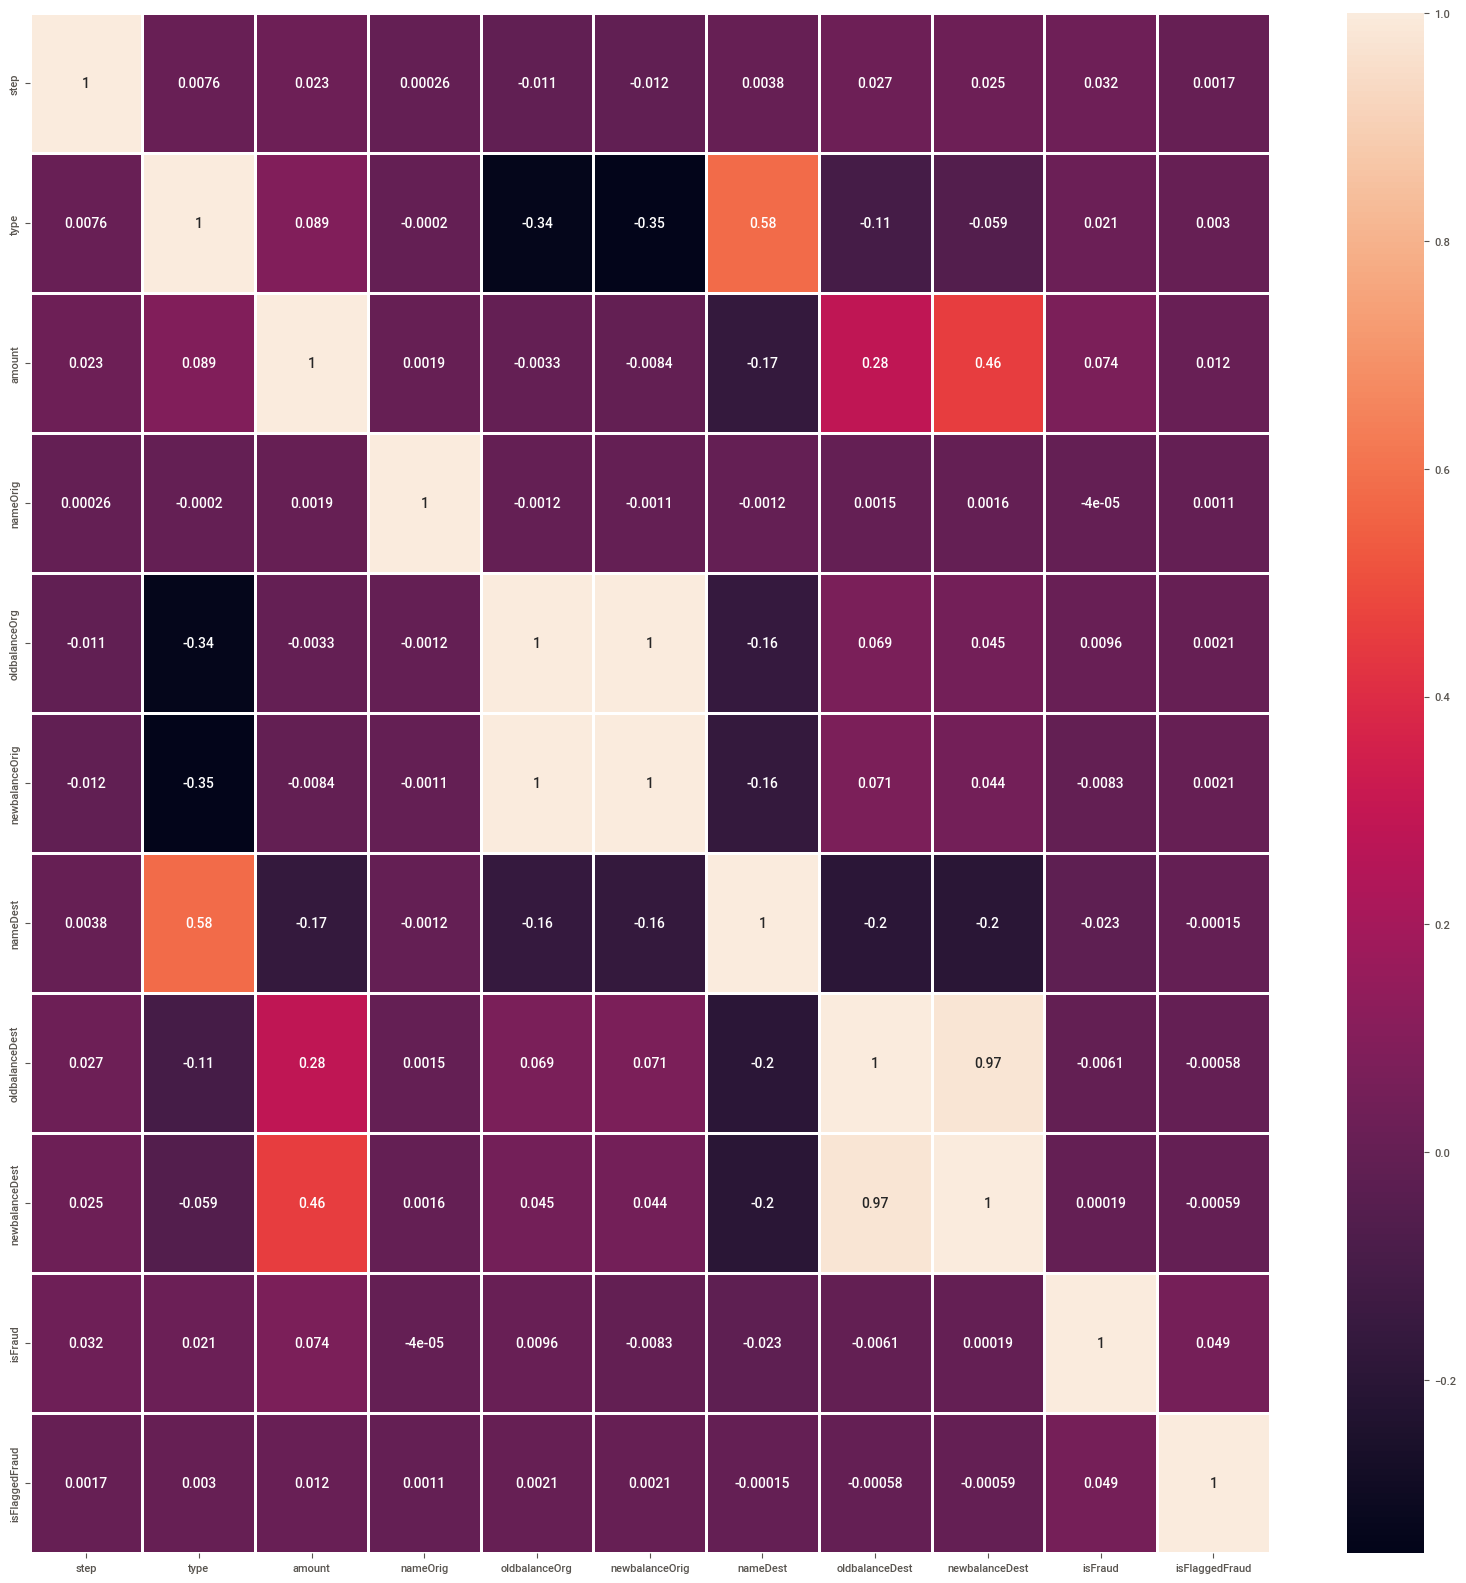

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True , linewidth=1)

#### (B) Checking outliers

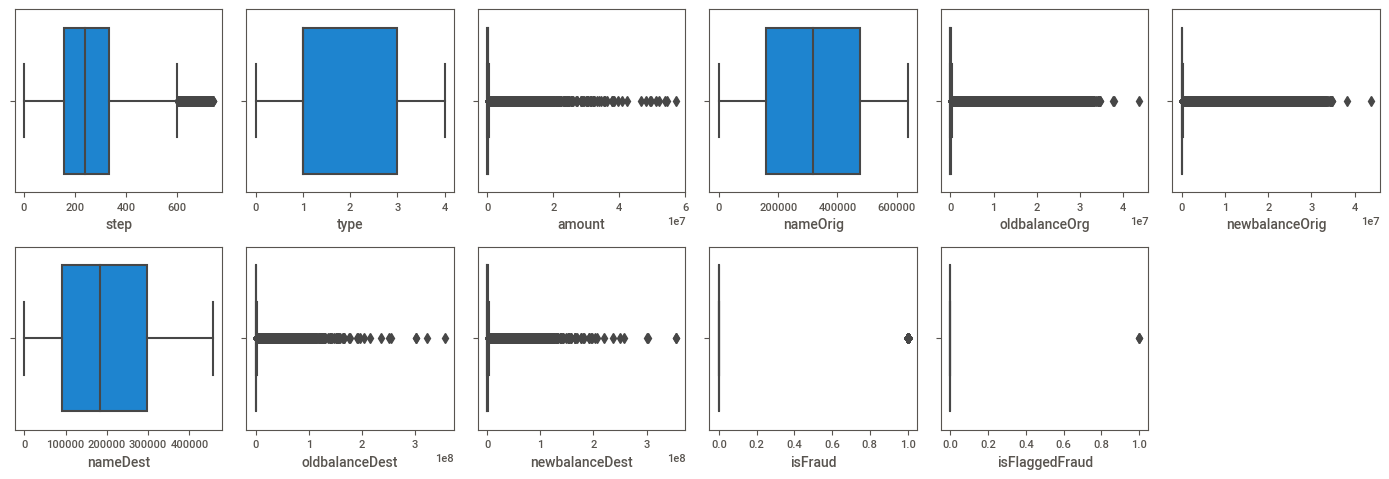

In [28]:
plt.figure(figsize=(14, 14))
plotnumber = 1

for i in data:
    plt.subplot(6, 6, plotnumber)
    sns.boxplot(x=data[i])
    plotnumber += 1
    if plotnumber > 27:
        break

plt.tight_layout()
plt.show()

##### --> Splitting the data  into Train and Test Split 

In [29]:
X=data.drop('isFraud',axis=1)
y=data.isFraud

In [30]:
X.shape

(636262, 10)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)

(509009, 10)
(127253, 10)


In [33]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
410203,40,0,29803.00,312016,31161.00,60964.00,122263,558338.33,528535.33,0
128972,188,0,144608.69,425683,6158831.47,6303440.16,101345,191932.45,47323.77,0
535818,227,4,789518.83,128189,0.00,0.00,215569,4175052.98,4964571.81,0
487910,323,1,601604.26,288861,21905.00,0.00,16360,1041614.78,1643219.03,0
625700,13,1,12277.32,214996,168809.00,156531.68,69055,0.00,12277.32,0
...,...,...,...,...,...,...,...,...,...,...
110268,47,3,11283.86,390264,3971.00,0.00,326349,0.00,0.00,0
259178,307,1,36714.36,114757,26643.00,0.00,204042,2586144.38,2622858.74,0
365838,275,1,228956.90,614092,50.00,0.00,101881,0.00,228956.90,0
131932,179,0,27412.88,492264,1183491.23,1210904.11,182963,202164.49,174751.61,0


In [34]:
X_test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
492123,37,1,267289.58,380833,397858.58,130569.00,137881,3664138.94,3931428.53,0
370792,234,3,52457.64,620494,0.00,0.00,430841,0.00,0.00,0
435806,687,3,35944.26,138110,0.00,0.00,447727,0.00,0.00,0
195013,132,1,152038.27,238537,0.00,0.00,92092,1920325.16,2072363.43,0
388753,349,1,200053.40,161136,0.00,0.00,199856,10364319.70,10564373.10,0
...,...,...,...,...,...,...,...,...,...,...
270919,260,0,68790.39,379994,4593585.55,4662375.94,190571,3241013.15,3172222.75,0
84397,159,3,8871.39,120195,119206.55,110335.16,455072,0.00,0.00,0
507861,41,3,15600.02,377645,0.00,0.00,335583,0.00,0.00,0
569219,204,3,12029.54,318076,10891.00,0.00,308812,0.00,0.00,0


In [35]:
y_train

410203    0
128972    0
535818    0
487910    0
625700    0
         ..
110268    0
259178    0
365838    0
131932    0
121958    0
Name: isFraud, Length: 509009, dtype: int64

##### --> Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Let's see oue target variable is balanced or not if it's not balanced. So, we have to apply SMOTE for balanced the data.
y.value_counts()
# here we can see our target variable is not balanced.

isFraud
0    635441
1       821
Name: count, dtype: int64

### 8.Model Creation

#### A. LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Creating a logistic regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculating and printing accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculating and printing F1-score
f1 = f1_score(y_test, predictions)
print("F1-score:", f1)

Accuracy: 0.9990962884961455
F1-score: 0.49339207048458145


##### B. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Define DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate F1 score on test set
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score on test set:", f1)

F1 score on test set: 0.9994929463371472


##### Hyperparameter Tuning for Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score  # Importing classification metrics

# Creating a DecisionTreeClassifier object with specified hyperparameters
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=30, min_samples_leaf=20, random_state=42)

# Training the model
dt.fit(X_train, y_train)

# Predicting on the test set
y_hat = dt.predict(X_test)

# Evaluating the model using accuracy and F1-score
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

print("Accuracy:", accuracy)
print("F1-score:", f1)

# Training score
y_train_predict = dt.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_predict)
f1_train = f1_score(y_train, y_train_predict)

print("Accuracy (Training):", accuracy_train)
print("F1-score (Training):", f1_train)

# Predicting on the test set
y_hat = dt.predict(X_test)

# Evaluating the model using accuracy and F1-score
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

print("Accuracy (Test):", accuracy)
print("F1-score (Test):", f1)

Accuracy: 0.9996306570375552
F1-score: 0.842809364548495
Accuracy (Training): 0.9996129734444774
F1-score (Training): 0.8314798973481609
Accuracy (Test): 0.9996306570375552
F1-score (Test): 0.842809364548495


##### C. Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score  # Importing classification metrics

# Creating a RandomForestClassifier object with 100 decision trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_clf.predict(X_test)

# Calculating and printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating and printing F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.9996463737593613
F1-score: 0.8484848484848485


##### D. Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# X = Your feature matrix
# y = Your target vector


# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9991120052179516
F1 Score: 0.998887217299468


## Classification Report 

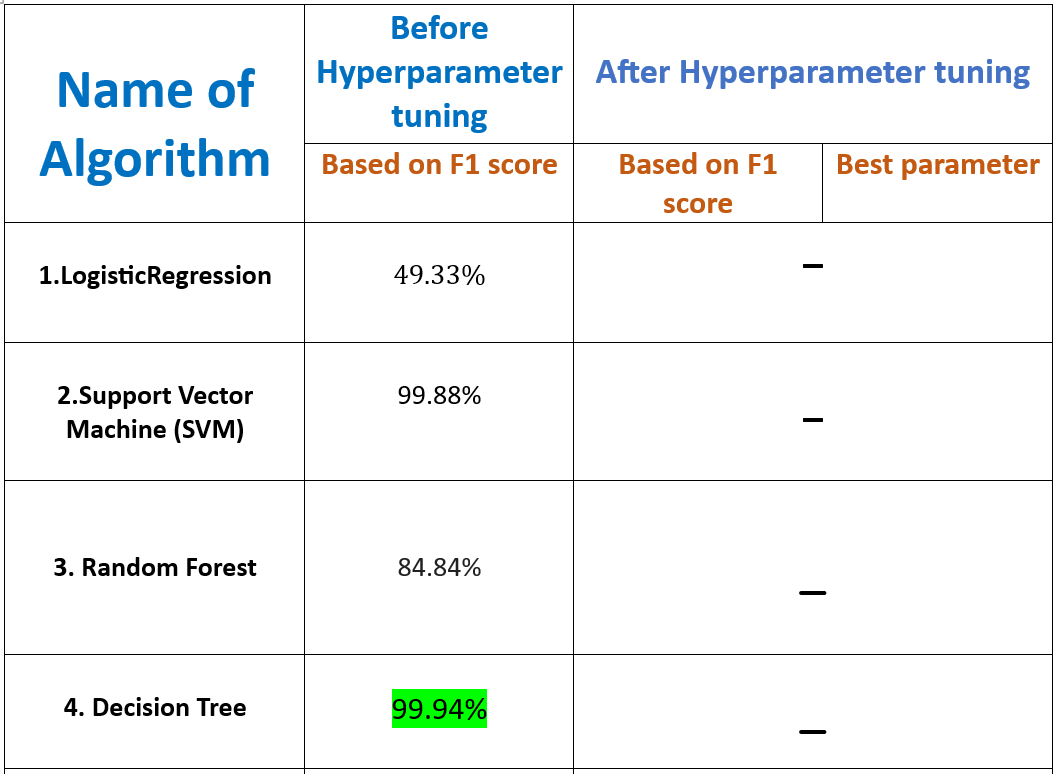

## Model Comparison Report  

We note that the Support Vector Machine algorithm has yielded the optimal model with the highest F1 score of 99.94%, while LogisticRegression has produced the least effective model with 49.33%
       